# Lesson 6

This notebook will cover the following topics:

1. Objects in recursion
2. Graphs and Trees using network X
3. Binary trees and binary search
4. Breadth First Search
5. Depth First Search

## 6.1  Objects in Recursion (Follow):  

**Learning Objectives:**

    1. Understand how objects are passed in recursion.
    2. understand how objects are referenced in recursion.

In [1]:
class counter_item:
    def __init__(self):
        self.__counter = 0

    def get_counter(self):
        return self.__counter

    def inc_counter(self):
        self.__counter += 1

    def dec_counter(self):
        self.__counter -= 1


def recursive_funct(object, depth):
    object.inc_counter()
    depth -= 1
  
    if depth == 0:
        return
    else:
        print(object.get_counter())
        recursive_funct(object, depth)
    
    print(object.get_counter())


In [2]:
def main():
    the_counter = counter_item()
    depth = 5

    recursive_funct(the_counter, depth)

main()

1
2
3
4
5
5
5
5


### As the above code executes, think about the following questions:

1. What is the value of self.__counter in each iteration?
2. Play around with the inc and dec functions to make sure you understand how everything is working.

## 6.1  Objects in Recursion (Group):  

**Write a program that will do the following:**

    1. Implement factorial with objects and recursion.
    2. Create at least one class and use that to store the calculated value for factorial.
    3. You may make the final calculation private or public.

In [1]:
"""
Factorial_item has getter and setter
"""
class Factorial_item:
    def __init__(self):
        self.__factorial_value = 0

    def get_factorial_value(self):
        return self.__factorial_value
    
    def set_factorial_value(self, new_factorial_value):
        self.__factorial_value = new_factorial_value
        

# recur_factorial recur
def recur_factorial(object,num):
    if num == 1:
        object.set_factorial_value(1)
        return object.get_factorial_value()
    else:
        object.set_factorial_value(num)
        return object.get_factorial_value()*recur_factorial(object, num-1)
    
    
def validation(object, num):
    if num < 0:
       print("Sorry, factorial does not exist for negative numbers")
    elif num == 0:
       print("The factorial of 0 is 1")
    else:
       print("The factorial of", num, "is", recur_factorial(object, num))  
    
    
if __name__ == '__main__':
    factorial_item = Factorial_item()
    validation(factorial_item, 7)    

The factorial of 7 is 5040


## 6.2 Graphs and Trees using network X (Follow):  

**Learning Objectives:**

    1. Understand the structure of graphs and trees.
    2. Understand how to create graphs and trees.
    3. Understand the network X library in python.


In [10]:
# add comments to the code
# https://networkx.org/documentation/stable/reference/introduction.html#
import networkx as nx  # to add this library type: "conda install networkx"
import matplotlib.pyplot as plt # to add this library type: "conda install matplotlib"

Other_Graph = nx.Graph()
Other_Graph.add_edge("a", "b", weight=0.6)
Other_Graph.add_edge("a", "c", weight=0.2)
Other_Graph.add_edge("c", "d", weight=0.1)
Other_Graph.add_edge("c", "e", weight=0.7)
Other_Graph.add_edge("c", "f", weight=0.9)
Other_Graph.add_edge("a", "d", weight=0.3)

In [11]:
elarge = [(u, v) for (u, v, d) in Other_Graph.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in Other_Graph.edges(data=True) if d["weight"] <= 0.5]

In [15]:
# data validation for Other_Graph.edges
for (u,v,d) in Other_Graph.edges(data=True):
    print(u,v,d)

a b {'weight': 0.6}
a c {'weight': 0.2}
a d {'weight': 0.3}
c d {'weight': 0.1}
c e {'weight': 0.7}
c f {'weight': 0.9}


In [24]:
for (u,v) in elarge:
    print(u,v)

a b
c e
c f


In [25]:
for (u,v) in esmall:
    print(u,v)

a c
a d
c d


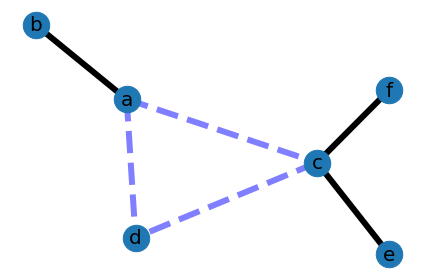

In [23]:
# position of the graph seed = 7 is will return the same graph every time. 
pos = nx.spring_layout(Other_Graph, seed=7)

# Add the small edges and large edges in the same graph by steps:
# Draw the network nodes with the position and set node size to 700
nx.draw_networkx_nodes(Other_Graph, pos, node_size=700)
# Draw the large edges:
nx.draw_networkx_edges(Other_Graph, pos, edgelist=elarge, width=6, label = 'weight')
# Draw the samll edges with custom styles:
nx.draw_networkx_edges(Other_Graph, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed", label = 'weights')

nx.draw_networkx_labels(Other_Graph, pos, font_size=20, font_family="sans-serif")
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

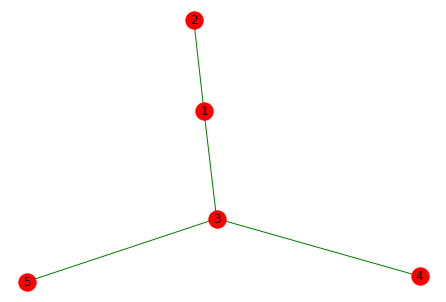

The number of nodes in the first graph =  5
The number of edges in the first graph =  4


In [49]:
import networkx as nx  # to add this library type: "conda install networkx"
import matplotlib.pyplot as plt # to add this library type: "conda install matplotlib"


G = nx.Graph() # create Graph object
G.add_node(1) # add node number (1)
G.add_nodes_from([2, 3]) # add nodes from (2,3)
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"}),]) # add nodes from 4

# G add edges
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(3, 4)
G.add_edge(3, 5)

# G draw teh 
pos = nx.spring_layout(G, seed=7)
nx.draw(G, pos, node_color = 'r', edge_color = 'g', with_labels = True)
plt.show()

print("The number of nodes in the first graph = ", G.number_of_nodes())
print("The number of edges in the first graph = ", G.number_of_edges())

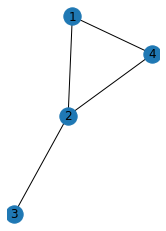

In [70]:
import networkx as nx  # to add this library type: "conda install networkx"
import matplotlib.pyplot as plt # to add this library type: "conda install matplotlib"

# Graph new networkx graph
Graph = nx.Graph()
# List of edges
edge_list = [(1, 2), (2, 3), (1, 4), (4, 2)]
# Graph add edges from
Graph.add_edges_from(edge_list)

# Draw sub plot
subax1 = plt.subplot(121)

# 
pos = nx.spring_layout(Graph, seed=1)
nx.draw(Graph, pos, with_labels=True)   
plt.show()

### As the above code executes, think about the following questions:

1. Try playing around with different options in the draw functions and see how things work.
2. What does the plt.show() function do?
3. What does the seed = 7 parameter do?
4. What do the options in the last few lines do?  Are they necessary?

## 6.2 Graphs and Trees using network X (Group):  

**Write a program that will do the following:**

    1. Use the documentation to explore different ways to make graphs using network x.
    2. Try creating different graphs including directional graphs and multigraphs.
    3. Try changing colors and sizes for nodes.
    4. Try experimenting with the layout options.
    5. Be prepared to present some of the things you have learned exploring network x.


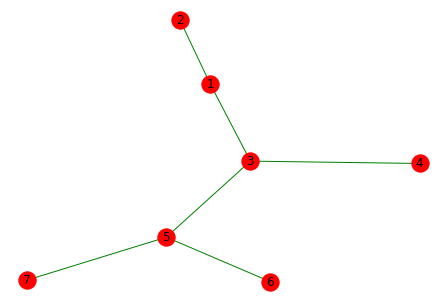

The number of nodes in the first graph =  7
The number of edges in the first graph =  6


In [75]:
import networkx as nx  # to add this library type: "conda install networkx"
import matplotlib.pyplot as plt # to add this library type: "conda install matplotlib"


G = nx.Graph() # create Graph object
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7]) # add nodes


# G add edges
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(6, 5)
G.add_edge(5, 7)

# G draw teh 
pos = nx.spring_layout(G, seed=7)
nx.draw(G, pos, node_color = 'r', edge_color = 'g', with_labels = True)
plt.show()

print("The number of nodes in the first graph = ", G.number_of_nodes())
print("The number of edges in the first graph = ", G.number_of_edges())

## 6.3 Binary trees and binary search (Follow):  

**Learning Objectives:**

    1. Understand binary trees.
    2. Understand binary search.
    3. Understand the necessity for binary trees.

In [ ]:
# add comment to the code

# you will need to run the following command in the conda powershell before running
# conda install --channel conda-forge pygraphviz -y

import matplotlib.pyplot as plt  #if you are getting errors, remember to install missing packages
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout


T = nx.balanced_tree(2, 5)

# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.graphviz_layout.html
pos = graphviz_layout(T, prog="twopi")
nx.draw(T, pos)
plt.show()

pos = graphviz_layout(T, prog="dot")
nx.draw(T, pos)
plt.show()

pos = graphviz_layout(T, prog="circo")
nx.draw(T, pos)
plt.show()

In [ ]:
# add comments to the code

def binarySearch(arr, l, r, x):
  
    if r >= l:
  
        mid = l + (r - l) // 2
        if arr[mid] == x:
            return mid
  
        elif arr[mid] > x:
            return binarySearch(arr, l, mid-1, x)
  
        else:
            return binarySearch(arr, mid + 1, r, x)
  
    else:
        return -1
  
  

arr = [2, 3, 4, 10, 40]
x = 10
  
result = binarySearch(arr, 0, len(arr)-1, x)
  
if result != -1:
    print("Element is present at index % d" % result)
else:
    print("Element is not present in array")

### As the above code executes, think about the following questions:

1. Play around with the binary trees generated and try to understand the parameters passed into the functions.
2. Look at binary search.  What is the big assumption the algorithm makes before starting search?
3. Why is binary search more efficient than linear search?

## 6.3 Binary trees and binary search (Group):  

**Write a program that will do the following:**

    1. Try to come up with an application where you would use a binary tree or binary search.
    2. The application can be from work or life.
    3. You may code the example if you feel it is necessary or you may just write some notes below.
    4. You may be asked to share your project.

## 6.4 Breadth first search (Follow):  

**Learning Objectives:**

    1. Understand how breadth first search works
    2. Understand why breadth first search is implemented.
    3. Understand the necessity for breadth first search.


In [ ]:
# add comments to the code

from collections import defaultdict
 
class Graph:
 
    def __init__(self):
        self.graph = defaultdict(list)
 
    def addEdge(self,u,v):
        self.graph[u].append(v)
 
    def BFS(self, s):
        visited_queue = []
        BFS_queue = []
 
        BFS_queue.append(s)
        visited_queue.append(s)

        while BFS_queue:
            s = BFS_queue.pop(0)
            print (s, end = " ")
 
            for i in self.graph[s]:
                if i not in visited_queue:
                    BFS_queue.append(i)
                    visited_queue.append(i)
 
 

In [ ]:
g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 4)

start_node = 2

print (f"Breadth First Tree Traversal (starting from node {start_node})")
g.BFS(start_node)


### As the above code executes, think about the following questions:

1. Try starting the search from a couple of different start nodes and trace the traversal.
2. What is the function of the visited queue?
3. What is the function of the BFS_queue?
4. Why do we use a queue for breadth first search?

## 6.4 Breadth first search (Group):  

**Write a program that will do the following:**

    1. Implement breadth first search.
    2. Implement a class Node.
    3. Node class should have attributes value, and parent.
    4. Graph class should **not** inherit the node class.
    5. Create a graph object and use the add edge function to create a graph of nodes.  
    6. Create at least 5 or 6 nodes.
    7. Perform BFS and print the results of BFS.
    8. As an added challenge, create a function to keep track of the parents of each node.
    9. If you create the function, try printing these parents.


## 6.5 Depth first search (Follow):  

**Learning Objectives:**

    1. Understand how depth first search works
    2. Understand why depth first search is implemented.
    3. Understand the necessity for depth first search.

In [ ]:
# Add comments to the code

from collections import defaultdict
 
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
 
    def addEdge(self,u,v):
        self.graph[u].append(v)


    def DFS(self, s):
        visited_list = []
        DFS_stack = []
 
        DFS_stack.append(s)
        visited_list.append(s)

        while DFS_stack:
            s = DFS_stack.pop(-1)
            print (s, end = " ")
 
            for i in self.graph[s]:
                if i not in visited_list:
                    DFS_stack.append(i)
                    visited_list.append(i)
 


In [ ]:

g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 4)
 
start_node = 0

print(f"Following is DFS from (starting from node {start_node})")
g.DFS(start_node)
 

### As the above code executes, think about the following questions:

1. Try starting the search from a couple of different start nodes and trace the traversal.
2. What is the function of the visited queue?
3. What is the function of the DFS_queue?
4. Why do we use a stack for depth first search?

## 6.5 Depth first search (Group):  

**Write a program that will do the following:**

    1. Implement depth first search.
    2. Implement a class Node.
    3. Node class should have attributes value, and parent.
    4. Graph class should **not** inherit the node class.
    5. Create a graph object and use the add edge function to create a graph of nodes.  
    6. Create at least 5 or 6 nodes.
    7. Perform DFS and print the results of DFS.
    8. As an added challenge, create a function to keep track of the parents of each node.
    9. If you create the function, try printing these parents.